In [1]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from math import sqrt
import numpy as np

In [2]:
class sobel_edge_detector:
    def __init__(self, path=None, img=None):
        if path != None:
            self.image = mpimg.imread(path)
        else:
            self.image = img
        self.orig_img = self.image
        self.vertical_grad_filter = np.array(
            [[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        self.horizontal_grad_filter = np.array(
            [[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        print(self.image)

    def cvt2gray(self):
        self.image = np.dot(self.image, [1, 1, 1])//3
        self.image = self.image/255
        print(self.image)

    def detect_edges(self):
        self.cvt2gray()
        kernel_width = self.vertical_grad_filter.shape[0]//2
        grad_ = np.zeros(self.image.shape)

        self.image = np.pad(self.image, pad_width=([kernel_width, ], [kernel_width, ]),
                            mode='constant', constant_values=(0, 0))
        for i in range(kernel_width, self.image.shape[0] - kernel_width):
            for j in range(kernel_width, self.image.shape[1] - kernel_width):
                x = self.image[i - kernel_width: i + kernel_width +
                               1, j - kernel_width: j + kernel_width + 1]
                x = x.flatten() * self.vertical_grad_filter.flatten()
                sum_x = x.sum()

                y = self.image[i - kernel_width: i + kernel_width +
                               1, j - kernel_width: j + kernel_width + 1]
                y = y.flatten() * self.horizontal_grad_filter.flatten()
                sum_y = y.sum()

                grad_[i - kernel_width][j -
                                        kernel_width] = sqrt(sum_x**2 + sum_y**2)
        self.image = grad_
        return self.image
        # loc_time = time.localtime(time.time())
        # m = str(loc_time.tm_year) + str(loc_time.tm_mon) + str(loc_time.tm_mday) + str(loc_time.tm_hour) + str(loc_time.tm_min) + str(loc_time.tm_sec)
        # img_save_name = 'sobel_edge_det_' + m + ".jpg"
        # plt.imsave(img_save_name, self.image)

    def show_image(self, orig=0):
        if orig == 1:
            plt.imshow(self.orig_img)
            plt.show()
        if orig == 0:
            for i in range(len(self.image)):
                for j in range(len(self.image[0])):
                    self.image[i][j] = 1 - self.image[i][j]
            plt.imshow(self.image, cmap='gray')
            plt.show()

In [ ]:
s = sobel_edge_detector(path='test.jpg')

In [ ]:

class sobel_edge_detector:
    def __init__(self, path=None, img=None):
        if path != None:
            self.image = mpimg.imread(path)
        else:
            self.image = img
        self.orig_img = self.image
        self.vertical_grad_filter = np.array(
            [[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        self.horizontal_grad_filter = np.array(
            [[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        print(self.image)

    def cvt2gray(self):
        self.image = np.dot(self.image, [1, 1, 1])//3
        self.image = self.image/255
        print(self.image)

    def detect_edges(self):
        self.cvt2gray()
        kernel_width = self.vertical_grad_filter.shape[0]//2
        grad_ = np.zeros(self.image.shape)

        self.image = np.pad(self.image, pad_width=([kernel_width, ], [kernel_width, ]),
                            mode='constant', constant_values=(0, 0))
        for i in range(kernel_width, self.image.shape[0] - kernel_width):
            for j in range(kernel_width, self.image.shape[1] - kernel_width):
                x = self.image[i - kernel_width: i + kernel_width +
                               1, j - kernel_width: j + kernel_width + 1]
                x = x.flatten() * self.vertical_grad_filter.flatten()
                sum_x = x.sum()

                y = self.image[i - kernel_width: i + kernel_width +
                               1, j - kernel_width: j + kernel_width + 1]
                y = y.flatten() * self.horizontal_grad_filter.flatten()
                sum_y = y.sum()

                grad_[i - kernel_width][j -
                                        kernel_width] = sqrt(sum_x**2 + sum_y**2)
        self.image = grad_
        return self.image
        # loc_time = time.localtime(time.time())
        # m = str(loc_time.tm_year) + str(loc_time.tm_mon) + str(loc_time.tm_mday) + str(loc_time.tm_hour) + str(loc_time.tm_min) + str(loc_time.tm_sec)
        # img_save_name = 'sobel_edge_det_' + m + ".jpg"
        # plt.imsave(img_save_name, self.image)

    def show_image(self, orig=0):
        if orig == 1:
            plt.imshow(self.orig_img)
            plt.show()
        if orig == 0:
            for i in range(len(self.image)):
                for j in range(len(self.image[0])):
                    self.image[i][j] = 1 - self.image[i][j]
            plt.imshow(self.image, cmap='gray')
            plt.show()


######################################

# robert operator [[-1,-1],[1,1]]


def robert(img):
    r, c = img.shape
    r_sunnzi = [[-1, -1], [1, 1]]
    for x in range(r):
        for y in range(c):
            if (y + 2 <= c) and (x + 2 <= r):
                imgChild = img[x:x+2, y:y+2]
                list_robert = r_sunnzi*imgChild
                img[x, y] = abs(list_robert.sum())  # sum and absolute value
    return img


###############################
filter_dim = 5  # A matrix for the gaussian filter
sigma_val = 5  # sigma is the standard deviation


def gaussian_filter(image, filter_size, sigma):
    """This function uses gaussian filter to remove image noise"""
    filtered_image = cv2.GaussianBlur(image, (filter_size, filter_size), sigma)
    return filtered_image


def prewitt_filter(any_image):
    """This function uses prewitt filter to detect image edges"""
    image = gaussian_filter(any_image, filter_size=filter_dim, sigma=sigma_val)
    vertical_filter = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    horizontal_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

    vertical_filtered = cv2.filter2D(image, -1, vertical_filter)
    horizontal_filtered = cv2.filter2D(image, -1, horizontal_filter)

    abs_grad_x = cv2.convertScaleAbs(vertical_filtered)
    abs_grad_y = cv2.convertScaleAbs(horizontal_filtered)

    # 0.5 is the sqrt of the abs values
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return grad


####################################
if __name__ == "__main__":
    img = sobel_edge_detector("test.jpg")
    img.show_image(1)
    img.detect_edges()
    img.show_image()


In [3]:

###### CANNY######


def sHalf(T, sigma):
    temp = -np.log(T) * 2 * (sigma ** 2)
    return np.round(np.sqrt(temp))


def calculate_filter_size(T, sigma):
    return 2*sHalf(T, sigma) + 1


def MaskGeneration(T, sigma):
    N = calculate_filter_size(T, sigma)
    shalf = sHalf(T, sigma)
    y, x = np.meshgrid(range(-int(shalf), int(shalf) + 1),
                       range(-int(shalf), int(shalf) + 1))
    return x, y


def Gaussian(x, y, sigma):
    temp = ((x ** 2) + (y ** 2)) / (2 * (sigma ** 2))
    return (np.exp(-temp))


def calculate_gradient_X(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -((x * np.exp(-temp)) / sigma ** 2)


def calculate_gradient_Y(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -((y * np.exp(-temp)) / sigma ** 2)


def pad(img, kernel):
    r, c = img.shape
    kr, kc = kernel.shape
    padded = np.zeros((r + kr, c + kc), dtype=img.dtype)
    insert = np.uint((kr)/2)
    padded[insert: insert + r, insert: insert + c] = img
    return padded


def smooth(img, kernel=None):
    if kernel is None:
        mask = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
    else:
        mask = kernel
    i, j = mask.shape
    output = np.zeros((img.shape[0], img.shape[1]))
    image_padded = pad(img, mask)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            output[x, y] = (mask * image_padded[x:x+i, y:y+j]
                            ).sum() / mask.sum()
    return output


def Create_Gx(fx, fy):
    gx = calculate_gradient_X(fx, fy, sigma)
    gx = (gx * 255)
    return np.around(gx)


def Create_Gy(fx, fy):
    gy = calculate_gradient_Y(fx, fy, sigma)
    gy = (gy * 255)
    return np.around(gy)


def ApplyMask(image, kernel):
    i, j = kernel.shape
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)
    image_padded = pad(image, kernel)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            output[x, y] = (kernel * image_padded[x:x+i, y:y+j]).sum()
    return output


def Gradient_Magnitude(fx, fy):
    mag = np.zeros((fx.shape[0], fx.shape[1]))
    mag = np.sqrt((fx ** 2) + (fy ** 2))
    mag = mag * 100 / mag.max()
    return np.around(mag)


def Gradient_Direction(fx, fy):
    g_dir = np.zeros((fx.shape[0], fx.shape[1]))
    g_dir = np.rad2deg(np.arctan2(fy, fx)) + 180
    return g_dir


def Digitize_angle(Angle):
    quantized = np.zeros((Angle.shape[0], Angle.shape[1]))
    for i in range(Angle.shape[0]):
        for j in range(Angle.shape[1]):
            if 0 <= Angle[i, j] <= 22.5 or 157.5 <= Angle[i, j] <= 202.5 or 337.5 < Angle[i, j] < 360:
                quantized[i, j] = 0
            elif 22.5 <= Angle[i, j] <= 67.5 or 202.5 <= Angle[i, j] <= 247.5:
                quantized[i, j] = 1
            elif 67.5 <= Angle[i, j] <= 122.5 or 247.5 <= Angle[i, j] <= 292.5:
                quantized[i, j] = 2
            elif 112.5 <= Angle[i, j] <= 157.5 or 292.5 <= Angle[i, j] <= 337.5:
                quantized[i, j] = 3
    return quantized


def Non_Max_Supp(qn, magni, D):
    M = np.zeros(qn.shape)
    a, b = np.shape(qn)
    for i in range(a-1):
        for j in range(b-1):
            if qn[i, j] == 0:
                if magni[i, j-1] < magni[i, j] or magni[i, j] > magni[i, j+1]:
                    M[i, j] = D[i, j]
                else:
                    M[i, j] = 0
            if qn[i, j] == 1:
                if magni[i-1, j+1] <= magni[i, j] or magni[i, j] >= magni[i+1, j-1]:
                    M[i, j] = D[i, j]
                else:
                    M[i, j] = 0
            if qn[i, j] == 2:
                if magni[i-1, j] <= magni[i, j] or magni[i, j] >= magni[i+1, j]:
                    M[i, j] = D[i, j]
                else:
                    M[i, j] = 0
            if qn[i, j] == 3:
                if magni[i-1, j-1] <= magni[i, j] or magni[i, j] >= magni[i+1, j+1]:
                    M[i, j] = D[i, j]
                else:
                    M[i, j] = 0
    return M


def color(quant, mag):
    color = np.zeros((mag.shape[0], mag.shape[1], 3), np.uint8)
    a, b = np.shape(mag)
    for i in range(a-1):
        for j in range(b-1):
            if quant[i, j] == 0:
                if mag[i, j] != 0:
                    color[i, j, 0] = 255
                else:
                    color[i, j, 0] = 0
            if quant[i, j] == 1:
                if mag[i, j] != 0:
                    color[i, j, 1] = 255
                else:
                    color[i, j, 1] = 0
            if quant[i, j] == 2:
                if mag[i, j] != 0:
                    color[i, j, 2] = 255
                else:
                    color[i, j, 2] = 0
            if quant[i, j] == 3:
                if mag[i, j] != 0:
                    color[i, j, 0] = 255
                    color[i, j, 1] = 255

                else:
                    color[i, j, 0] = 0
                    color[i, j, 1] = 0
    return color


def _double_thresholding(g_suppressed, low_threshold, high_threshold):
    g_thresholded = np.zeros(g_suppressed.shape)
    for i in range(0, g_suppressed.shape[0]):		# loop over pixels
        for j in range(0, g_suppressed.shape[1]):
            if g_suppressed[i, j] < low_threshold:  # lower than low threshold
                g_thresholded[i, j] = 0
            # between thresholds
            elif g_suppressed[i, j] >= low_threshold and g_suppressed[i, j] < high_threshold:
                g_thresholded[i, j] = 128
            else:					        # higher than high threshold
                g_thresholded[i, j] = 255
    return g_thresholded


def _hysteresis(g_thresholded):
    g_strong = np.zeros(g_thresholded.shape)
    for i in range(0, g_thresholded.shape[0]):		# loop over pixels
        for j in range(0, g_thresholded.shape[1]):
            val = g_thresholded[i, j]
            if val == 128:			# check if weak edge connected to strong
                if g_thresholded[i-1, j] == 255 or g_thresholded[i+1, j] == 255 or g_thresholded[i-1, j-1] == 255 or g_thresholded[i+1, j-1] == 255 or g_thresholded[i-1, j+1] == 255 or g_thresholded[i+1, j+1] == 255 or g_thresholded[i, j-1] == 255 or g_thresholded[i, j+1] == 255:
                    g_strong[i, j] = 255		# replace weak edge as strong
            elif val == 255:
                g_strong[i, j] = 255		# strong edge remains as strong edge
    return g_strong


# Specify sigma and T value Also calculate Gradient masks
sigma = 0.5
T = 0.3
x, y = MaskGeneration(T, sigma)
gauss = Gaussian(x, y, sigma)

gx = -Create_Gx(x, y)
gy = -Create_Gy(x, y)

# Reading and converting image into grayscale
image = cv2.imread('../images/02.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Smoothing
smooth_img = smooth(gray, gauss)

# Applying the Gradient masks
fx = ApplyMask(smooth_img, gx)
fy = ApplyMask(smooth_img, gy)

# Gradient magnitude
mag = Gradient_Magnitude(fx, fy)
mag = mag.astype(int)

# Gradient Direction
Angle = Gradient_Direction(fx, fy)

# Quantization of angles and Non-Max Suppression
quantized = Digitize_angle(Angle)
nms = Non_Max_Supp(quantized, Angle, mag)

# Colorized Image for visualiztion of angles
colorized = color(quantized, mag)
cv2.imwrite('color.jpg', colorized)

# Double Threshold and Hysteresis
threshold = _double_thresholding(nms, 30, 60)
cv2.imwrite('double_thresholded.jpg', threshold)
hys = _hysteresis(threshold)
cv2.imwrite('Result.jpg', hys)

TypeError: slice indices must be integers or None or have an __index__ method

In [43]:
import cv2
from matplotlib import pyplot as plt
from math import sqrt
import numpy as np

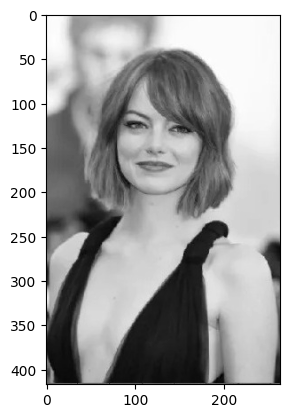

In [61]:
img = cv2.imread('../images/00.jpeg', 0)
plt.imshow(img, cmap='gray')

In [45]:
def gaussian_kernel( kernel_size, sigma):
        ax = np.linspace(-(kernel_size - 1) / 2.,
                         (kernel_size - 1) / 2., kernel_size)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-0.5 * (np.square(xx) +
                        np.square(yy)) / np.square(sigma))
        kernel = kernel / np.sum(kernel)
        return kernel


In [46]:
def gaussian_filter( image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        sigma = 2

        # get kernel
        kernel = gaussian_kernel(kernel_size, sigma)

        # apply zero padding
        image = np.pad(image, (kernel_size//2, kernel_size//2), 'constant')

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.sum(
                    image[i:i+kernel_size, j:j+kernel_size]*kernel)
        return new_image

In [58]:
def sobel_filter(image):
        row, col = image.shape
        new_image_x = np.zeros((row, col))
        new_image_y = np.zeros((row, col))

        # sobel masks
        mask_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        mask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

        # apply zero padding
        image = np.pad(image, (1, 1), 'constant')

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image_x[i, j] = np.sum(
                    image[i:i+3, j:j+3]*mask_x)
                new_image_y[i, j] = np.sum(
                    image[i:i+3, j:j+3]*mask_y)
        # combine the two images
        new_image = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
        angle = np.arctan2(new_image_y, new_image_x)
        return new_image , angle

In [103]:
def non_maximum_suppression(image, angles):
    size = image.shape

    # convert angles to degrees
    angles = angles * 180. / np.pi

    # remove negative angles
    angles[angles < 0] += 180

    # create a zero matrix with the same dimensions as the image
    suppressed = np.zeros(size)

    # loop through the image
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            # get the angle of the pixel
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                value_to_compare = max(image[i, j - 1], image[i, j + 1])
            elif (22.5 <= angles[i, j] < 67.5):
                value_to_compare = max(image[i - 1, j - 1], image[i + 1, j + 1])
            elif (67.5 <= angles[i, j] < 112.5):
                value_to_compare = max(image[i - 1, j], image[i + 1, j])
            else:
                value_to_compare = max(image[i + 1, j - 1], image[i - 1, j + 1])
            
            # compare the pixel to its neighbours in the direction of the gradient
            if image[i, j] >= value_to_compare:
                suppressed[i, j] = image[i, j]

    # scale the image to 0-255
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    
    return suppressed

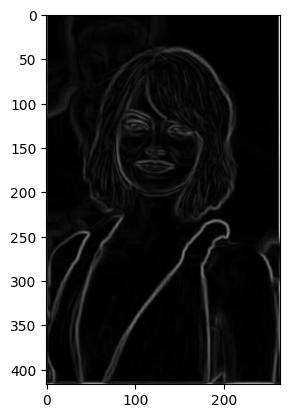

In [118]:
img = cv2.imread('../images/00.jpeg', 0)

img=gaussian_filter(img, 3)
img, angles = sobel_filter(img)
plt.imshow(img, cmap='gray')

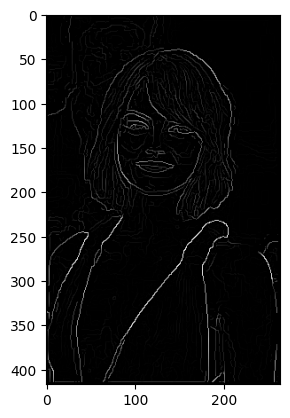

In [119]:
"""
The Canny edge detection algorithm is composed of 5 steps:
Noise reduction;
Gradient calculation;
Non-maximum suppression;
Double threshold;
Edge Tracking by Hysteresis.

"""

# get gradient magnitude and direction


newimg = non_maximum_suppression(img, angles)
plt.imshow(newimg, cmap='gray')



In [112]:
def double_threshold_hysteresis(image, low, high):
    weak = 50
    strong = 255
    size = image.shape
    result = np.zeros(size)
    weak_x, weak_y = np.where((image > low) & (image <= high))
    strong_x, strong_y = np.where(image >= high)
    result[strong_x, strong_y] = strong
    result[weak_x, weak_y] = weak
    dx = np.array((-1, -1, 0, 1, 1, 1, 0, -1))
    dy = np.array((0, 1, 1, 1, 0, -1, -1, -1))
    size = image.shape
    
    while len(strong_x):
        x = strong_x[0]
        y = strong_y[0]
        strong_x = np.delete(strong_x, 0)
        strong_y = np.delete(strong_y, 0)
        for direction in range(len(dx)):
            new_x = x + dx[direction]
            new_y = y + dy[direction]
            if((new_x >= 0 & new_x < size[0] & new_y >= 0 & new_y < size[1]) and (result[new_x, new_y]  == weak)):
                result[new_x, new_y] = strong
                np.append(strong_x, new_x)
                np.append(strong_y, new_y)
    result[result != strong] = 0
    return result

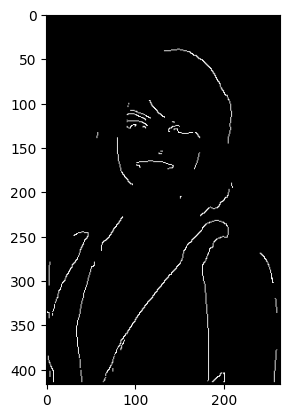

In [106]:
newwimg= double_threshold_hysteresis(newimg, 0,100)
plt.imshow(newwimg, cmap='gray')

In [1]:

from math import sqrt
import numpy as np


class Filters:
    def __init__(self):
        pass

    ######################################################################
    # Add noise to the image algorithms

    def salt_pepper_noise(self, image, range):
        row, col = image.shape
        salt_pepper = np.random.random((row, col))*255
        pepper = salt_pepper < 0+range
        salt = salt_pepper > 255-range
        image[pepper] = 0
        image[salt] = 255
        return image

    def gaussian_noise(self, image, range):
        row, col = image.shape
        mean = 0
        var = range
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col))
        gauss = gauss.reshape(row, col)
        noisy = image + gauss
        return noisy

    def uniform_noise(self, image, range):
        row, col = image.shape
        low = -range
        high = range
        noise = np.random.uniform(low, high, (row, col))
        noisy = image + noise
        return noisy

    ######################################################################
    # Smoothing filters algorithms

    def average_filter(self, image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.mean(
                    image[i:i+kernel_size, j:j+kernel_size])
        return new_image

    def median_filter(self, image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.median(
                    image[i:i+kernel_size, j:j+kernel_size])
        return new_image

    def gaussian_filter(self, image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        sigma = 2

        # get kernel
        kernel = self.__gaussian_kernel(kernel_size, sigma)
        print()
        # apply zero padding
        image = np.pad(image, (kernel_size//2, kernel_size//2), 'constant')

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.sum(
                    image[i:i+kernel_size, j:j+kernel_size]*kernel)
        return new_image

    def __gaussian_kernel(self, kernel_size, sigma):
        ax = np.linspace(-(kernel_size - 1) / 2.,
                         (kernel_size - 1) / 2., kernel_size)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-0.5 * (np.square(xx) +
                        np.square(yy)) / np.square(sigma))
        kernel = kernel / np.sum(kernel)
        return kernel

    ######################################################################
    # Edge detection algorithms

    def sobel_edge_detector(self, image):
        vertical_grad_filter = np.array(
            [[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        horizontal_grad_filter = np.array(
            [[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        return self.__detect_edges_helper(image, vertical_grad_filter, horizontal_grad_filter)

    def prewitt_edge_detector(self, image):
        vertical_grad_filter = np.array(
            [[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
        horizontal_grad_filter = np.array(
            [[1, 0, -1], [1, 0, -1], [1, 0, -1]])
        return self.__detect_edges_helper(image, vertical_grad_filter, horizontal_grad_filter)

    def roberts_edge_detector(self, image):
        vertical_grad_filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]])
        horizontal_grad_filter = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]])
        return self.__detect_edges_helper(image, vertical_grad_filter, horizontal_grad_filter)

    def canny_edge_detector(self, image, range):
        # apply gaussian filter
        image = self.gaussian_filter(image, 5)

        # apply sobel edge detector
        image = self.sobel_edge_detector(image)

        # apply non-maximum suppression
        image = self.__non_maximum_suppression(image)

        # # apply double threshold & hysteresis
        image = self.__double_threshold_hysteresis(image, 0, range)

        return image

    def __detect_edges_helper(self, image, vertical_grad_filter=None, horizontal_grad_filter=None):

        # normalize the image
        image = image/255

        # kernel width initialization
        kernel_width = vertical_grad_filter.shape[0]//2

        # initialize the gradient image
        gradient = np.zeros(image.shape)
        self.angles = np.zeros(image.shape)

        # pad the image
        image = np.pad(image, kernel_width, 'constant')

        # get the image dimensions
        rows, cols = image.shape

        # apply the filter
        for i in range(kernel_width, rows - kernel_width):
            for j in range(kernel_width, cols - kernel_width):

                # obtain the horizontal gradients
                x = image[i - kernel_width: i + kernel_width +
                          1, j - kernel_width: j + kernel_width + 1]
                x = x.flatten() * vertical_grad_filter.flatten()
                sum_x = x.sum()

                # obtain the vertical gradients
                y = image[i - kernel_width: i + kernel_width +
                          1, j - kernel_width: j + kernel_width + 1]
                y = y.flatten() * horizontal_grad_filter.flatten()
                sum_y = y.sum()

                # calculate the gradient
                gradient[i - kernel_width][j -
                                           kernel_width] = sqrt(sum_x**2 + sum_y**2)
                self.angles[i - kernel_width][j - kernel_width] = np.arctan2(sum_y, sum_x)
        
        return gradient

    def __non_maximum_suppression(self, image):
        size = image.shape

        # convert angles to degrees
        angles = self.angles * 180. / np.pi
        
        # remove negative angles and avoid 'numpy.float64' object does not support item assignment
        angles[angles < 0] += 180


        # create a zero matrix with the same dimensions as the image
        suppressed = np.zeros(size)

        # loop through the image
        for i in range(1, size[0] - 1):
            for j in range(1, size[1] - 1):
                # get the angle of the pixel
                if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                    value_to_compare = max(image[i, j - 1], image[i, j + 1])
                elif (22.5 <= angles[i, j] < 67.5):
                    value_to_compare = max(
                        image[i - 1, j - 1], image[i + 1, j + 1])
                elif (67.5 <= angles[i, j] < 112.5):
                    value_to_compare = max(image[i - 1, j], image[i + 1, j])
                else:
                    value_to_compare = max(
                        image[i + 1, j - 1], image[i - 1, j + 1])

                # compare the pixel to its neighbours in the direction of the gradient
                if image[i, j] >= value_to_compare:
                    suppressed[i, j] = image[i, j]

        # scale the image to 0-255
        suppressed = np.multiply(suppressed, 255.0 / suppressed.max())

        return suppressed

    def __double_threshold_hysteresis(self, image, low, high):

        weak = 50
        strong = 255

        # get the dimensions of the image
        rows, cols = image.shape

        # create a zero matrix with the same dimensions as the image
        result = np.zeros((rows, cols))

        # get the indices of the pixels that are above the low threshold
        weak_x, weak_y = np.where((image > low) & (image <= high))

        # get the indices of the pixels that are above the high threshold
        strong_x, strong_y = np.where(image >= high)

        # set the pixels that are above the high threshold to strong
        result[strong_x, strong_y] = strong

        # set the pixels that are above the low threshold to weak
        result[weak_x, weak_y] = weak

        # dx , dy are the directions to check for neighbours
        dx = np.array((-1, -1, 0, 1, 1, 1, 0, -1))
        dy = np.array((0, 1, 1, 1, 0, -1, -1, -1))

        # hysteresis
        while len(strong_x):
            x = strong_x[0]
            y = strong_y[0]
            strong_x = np.delete(strong_x, 0)
            strong_y = np.delete(strong_y, 0)
            for direction in range(len(dx)):
                new_x = x + dx[direction]
                new_y = y + dy[direction]
                if ((new_x >= 0 & new_x < rows & new_y >= 0 & new_y < cols) and (result[new_x, new_y] == weak)):
                    result[new_x, new_y] = strong
                    np.append(strong_x, new_x)
                    np.append(strong_y, new_y)
        result[result != strong] = 0
        return result


In [17]:
import cv2
import matplotlib.pyplot as plt
filterr = Filters()



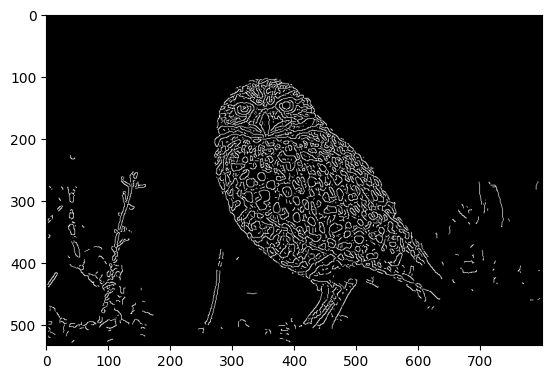

In [19]:
img = cv2.imread('../images/01.jpeg', 0)
plt.imshow(img)

newImage = filterr.canny_edge_detector(img,20)
plt.imshow(newImage, cmap='gray')

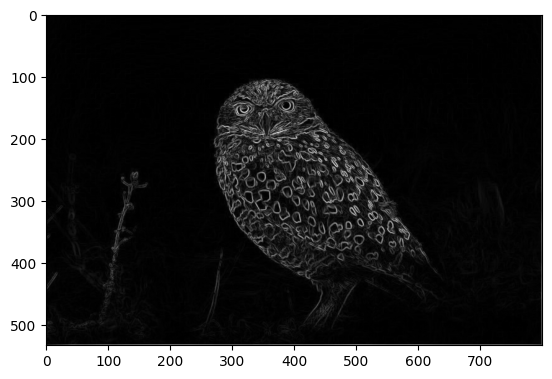

In [18]:
img = cv2.imread('../images/01.jpeg', 0)
plt.imshow(img)

newImage = filterr.sobel_edge_detector(img)
plt.imshow(newImage, cmap='gray')

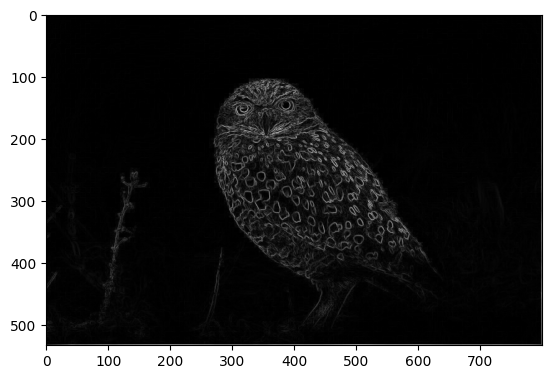

In [20]:
img = cv2.imread('../images/01.jpeg', 0)
plt.imshow(img)

newImage = filterr.roberts_edge_detector(img)
plt.imshow(newImage, cmap='gray')

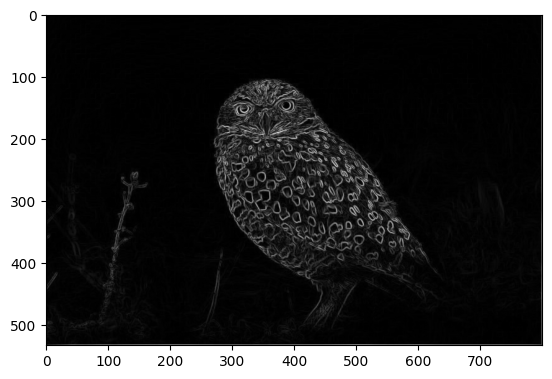

In [21]:
img = cv2.imread('../images/01.jpeg', 0)
plt.imshow(img)

newImage = filterr.prewitt_edge_detector(img)
plt.imshow(newImage, cmap='gray')